In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_parquet('../data/interim/meteorological_data_with_outages.parquet')
data.drop_duplicates(inplace=True)

In [3]:
data.columns

Index(['time', 'T2M', 'ALLSKY_SFC_SW_DWN', 'PS', 'WS50M', 'ALLSKY_SFC_LW_DWN',
       'WD50M', 'PRECTOTCORR', 'GWETPROF', 'CLRSKY_SFC_SW_DWN', 'QV10M',
       'RHOA', 'T10M', 'TO3', 'TQV', 'Z0M', 'TOA_SW_DWN', 'RH2M', 'WS2M',
       'CLRSKY_SFC_LW_DWN', 'DISPH', 'episode_fips_id',
       'meteorological_current_datetime_val', 'hours_to_outage',
       'outage_in_an_hour'],
      dtype='object')

In [4]:
data.sort_values(by=['episode_fips_id', 'meteorological_current_datetime_val'], inplace=True)
data.head()

,time,T2M,ALLSKY_SFC_SW_DWN,PS,WS50M,ALLSKY_SFC_LW_DWN,WD50M,PRECTOTCORR,GWETPROF,CLRSKY_SFC_SW_DWN,...,Z0M,TOA_SW_DWN,RH2M,WS2M,CLRSKY_SFC_LW_DWN,DISPH,episode_fips_id,meteorological_current_datetime_val,hours_to_outage,outage_in_an_hour
episode_fips_time_id,,,,,,,,,,,,,,,,,,,,,
100009_55009_2015081411,2015081411,31.06,815.92,99.03,6.17,407.52,293.9,1.69,0.62,838.92,...,0.06,1136.62,48.67,3.49,402.10,0.3,100009_55009,2015-08-14 11:00:00,11.0,0
100009_55009_2015081412,2015081412,31.48,800.83,99.00,6.42,411.45,294.3,2.84,0.62,836.10,...,0.06,1135.12,47.98,3.62,408.40,0.3,100009_55009,2015-08-14 12:00:00,10.0,0
100009_55009_2015081413,2015081413,31.57,639.47,98.97,6.70,419.52,296.0,5.70,0.61,783.12,...,0.06,1071.88,48.60,3.74,404.27,0.3,100009_55009,2015-08-14 13:00:00,9.0,0
100009_55009_2015081414,2015081414,31.37,343.15,98.95,6.92,446.12,298.4,8.90,0.61,680.40,...,0.06,951.17,50.34,3.81,403.17,0.3,100009_55009,2015-08-14 14:00:00,8.0,0
100009_55009_2015081415,2015081415,30.69,123.62,98.94,7.12,429.02,299.7,10.35,0.61,536.53,...,0.06,781.22,53.10,3.83,402.08,0.3,100009_55009,2015-08-14 15:00:00,7.0,0


In [5]:
data.head()

,time,T2M,ALLSKY_SFC_SW_DWN,PS,WS50M,ALLSKY_SFC_LW_DWN,WD50M,PRECTOTCORR,GWETPROF,CLRSKY_SFC_SW_DWN,...,Z0M,TOA_SW_DWN,RH2M,WS2M,CLRSKY_SFC_LW_DWN,DISPH,episode_fips_id,meteorological_current_datetime_val,hours_to_outage,outage_in_an_hour
episode_fips_time_id,,,,,,,,,,,,,,,,,,,,,
100009_55009_2015081411,2015081411,31.06,815.92,99.03,6.17,407.52,293.9,1.69,0.62,838.92,...,0.06,1136.62,48.67,3.49,402.10,0.3,100009_55009,2015-08-14 11:00:00,11.0,0
100009_55009_2015081412,2015081412,31.48,800.83,99.00,6.42,411.45,294.3,2.84,0.62,836.10,...,0.06,1135.12,47.98,3.62,408.40,0.3,100009_55009,2015-08-14 12:00:00,10.0,0
100009_55009_2015081413,2015081413,31.57,639.47,98.97,6.70,419.52,296.0,5.70,0.61,783.12,...,0.06,1071.88,48.60,3.74,404.27,0.3,100009_55009,2015-08-14 13:00:00,9.0,0
100009_55009_2015081414,2015081414,31.37,343.15,98.95,6.92,446.12,298.4,8.90,0.61,680.40,...,0.06,951.17,50.34,3.81,403.17,0.3,100009_55009,2015-08-14 14:00:00,8.0,0
100009_55009_2015081415,2015081415,30.69,123.62,98.94,7.12,429.02,299.7,10.35,0.61,536.53,...,0.06,781.22,53.10,3.83,402.08,0.3,100009_55009,2015-08-14 15:00:00,7.0,0


In [6]:
data.shape

(930136, 25)

In [7]:
data['abs_diff_between_t2m_t10m'] = data.apply(lambda row: abs(row['T2M'] - row['T10M']), axis=1)
data['abs_diff_between_ws50m_wd2m'] = data.apply(lambda row: abs(row['WS50M'] - row['WS2M']), axis=1)
no_delta_cols = ['time', 'episode_fips_id', 'meteorological_current_datetime_val', 'outage_in_an_hour', 'hours_to_outage']
for col in data.columns:
    if col not in no_delta_cols:
        data[f'{col}_an_hour_ago'] = data.groupby('episode_fips_id')[col].shift(1)
        data[f'{col}_two_hours_ago'] = data.groupby('episode_fips_id')[col].shift(2)
        data[f'{col}_three_hours_ago'] = data.groupby('episode_fips_id')[col].shift(3)
        data[f'{col}_delta_one_hour'] = data.apply(lambda row: row[col] - row[f'{col}_an_hour_ago'], axis=1)
        data[f'{col}_delta_two_hour'] = data.apply(lambda row: row[col] - row[f'{col}_two_hours_ago'], axis=1)
        data[f'{col}_delta_three_hour'] = data.apply(lambda row: row[col] - row[f'{col}_three_hours_ago'], axis=1)
        data[f'{col}_delta_previous'] = data.apply(lambda row: row[f'{col}_an_hour_ago'] - row[f'{col}_two_hours_ago'], axis=1)
        data[f'{col}_delta_two_previous'] = data.apply(lambda row: row[f'{col}_two_hours_ago'] - row[f'{col}_three_hours_ago'], axis=1)
        data[f'{col}_previous_tendency'] = data[f'{col}_delta_previous'].apply(lambda x: 1 if x> 0 else  (-1 if x <0 else 0))
        data[f'{col}_two_previous_tendency'] = data[f'{col}_delta_two_previous'].apply(lambda x: 1 if x> 0 else  (-1 if x <0 else 0))
        data[f'{col}_current_tendency'] = data[f'{col}_delta_one_hour'].apply(lambda x: 1 if x> 0 else  (-1 if x <0 else 0))
        

In [8]:
data.dropna(subset=['T2M_three_hours_ago'], inplace=True)

In [9]:
train_episode_fips_id, test_episode_fips_id = train_test_split(
    data.episode_fips_id.unique(), train_size=0.7, random_state=42
)

In [10]:
drop_cols = ['time', 'episode_fips_id', 'meteorological_current_datetime_val', 'hours_to_outage']

data_train = data[data.episode_fips_id.isin(train_episode_fips_id)].drop(drop_cols, axis=1)
data_test = data[data.episode_fips_id.isin(test_episode_fips_id)].drop(drop_cols, axis=1)

In [11]:
x_train, y_train = data_train.drop('outage_in_an_hour', axis=1), data_train.outage_in_an_hour
x_test, y_test = data_test.drop('outage_in_an_hour', axis=1), data_test.outage_in_an_hour

In [12]:
import numpy as np

In [13]:
len(np.where(y_train == 0)[0])

593357

In [14]:
from collections import Counter

neg, pos = Counter(y_train).values()
scale_pos_weight = neg / pos
scale_pos_weight

33.168818827212256

In [15]:
model = XGBClassifier(
    n_estimators=800,          
    max_depth=4,          
    scale_pos_weight=scale_pos_weight,  
    use_label_encoder=False,   
    objective='binary:logistic',
    eval_metric='aucpr',
    reg_lambda=1,
    subsample=0.75,
    colsample_bytree=0.75
          
)

In [16]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
pred_test = pd.Series(model.predict_proba(x_test)[:, 1])
pred_test.index = x_test.index

pred_train = pd.Series(model.predict_proba(x_train)[:, 1])
pred_train.index = x_train.index

In [18]:
roc_auc_score(y_train, pred_train), roc_auc_score(y_test, pred_test)

(np.float64(0.9752070527771863), np.float64(0.8625798301774893))

In [19]:
precision, recall, _ = precision_recall_curve(y_test, pred_test)
auc(recall, precision)

np.float64(0.25104055310064505)

In [20]:
response_var = pd.read_parquet('../data/interim/storm_outages_2014_2023.parquet')

In [21]:
sample_id = pd.Series(train_episode_fips_id).sample(1).iloc[0]
sample_data = data[data.episode_fips_id==sample_id]
sample_data['pred'] = pred_train

In [22]:
sample_data

,time,T2M,ALLSKY_SFC_SW_DWN,PS,WS50M,ALLSKY_SFC_LW_DWN,WD50M,PRECTOTCORR,GWETPROF,CLRSKY_SFC_SW_DWN,...,abs_diff_between_ws50m_wd2m_three_hours_ago,abs_diff_between_ws50m_wd2m_delta_one_hour,abs_diff_between_ws50m_wd2m_delta_two_hour,abs_diff_between_ws50m_wd2m_delta_three_hour,abs_diff_between_ws50m_wd2m_delta_previous,abs_diff_between_ws50m_wd2m_delta_two_previous,abs_diff_between_ws50m_wd2m_previous_tendency,abs_diff_between_ws50m_wd2m_two_previous_tendency,abs_diff_between_ws50m_wd2m_current_tendency,pred
episode_fips_time_id,,,,,,,,,,,,,,,,,,,,,
174450_33015_2022090100,2022090100,17.03,0.00,99.56,4.69,324.65,228.3,0.06,0.32,0.00,...,4.42,-0.14,8.881784e-16,0.09,0.14,0.09,1,1,-1,0.061526
174450_33015_2022090101,2022090101,16.91,0.00,99.55,4.59,325.77,231.3,0.06,0.32,0.00,...,4.51,-0.12,-2.600000e-01,-0.12,-0.14,0.14,-1,1,-1,0.023796
174450_33015_2022090102,2022090102,16.67,0.00,99.56,4.38,321.95,238.3,0.01,0.32,0.00,...,4.65,-0.20,-3.200000e-01,-0.46,-0.12,-0.14,-1,-1,-1,0.023830
174450_33015_2022090103,2022090103,16.34,0.00,99.58,4.27,322.45,243.4,0.00,0.32,0.00,...,4.51,-0.11,-3.100000e-01,-0.43,-0.20,-0.12,-1,-1,-1,0.025662
174450_33015_2022090104,2022090104,16.03,0.00,99.61,4.14,344.12,245.6,0.00,0.32,0.00,...,4.39,-0.12,-2.300000e-01,-0.43,-0.11,-0.20,-1,-1,-1,0.019609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174450_33015_2022090605,2022090605,15.48,8.57,100.74,3.68,365.33,67.5,25.03,0.36,17.65,...,3.44,0.05,-2.100000e-01,0.07,-0.26,0.28,-1,1,1,0.159457
174450_33015_2022090606,2022090606,15.56,11.90,100.75,3.43,375.62,68.3,22.26,0.36,163.02,...,3.72,-0.23,-1.800000e-01,-0.44,0.05,-0.26,1,-1,-1,0.205036
174450_33015_2022090607,2022090607,15.84,31.67,100.77,3.39,379.00,75.3,31.56,0.36,346.85,...,3.46,-0.04,-2.700000e-01,-0.22,-0.23,0.05,-1,1,-1,0.099013


In [23]:
pred_train.index.value_counts()

episode_fips_time_id
100009_55087_2015081414    1
172729_48167_2022070321    1
172729_48167_2022070323    1
172729_48167_2022070400    1
172729_48167_2022070401    1
                          ..
147801_34015_2020062018    1
147801_34015_2020062019    1
147801_34015_2020062020    1
147801_34015_2020062021    1
99992_55105_2015091805     1
Name: count, Length: 611246, dtype: int64

In [24]:
data.loc['164119_06029_2021120823']

time                                                 2021120823
T2M                                                        8.91
ALLSKY_SFC_SW_DWN                                           0.0
PS                                                        92.91
WS50M                                                      1.78
                                                        ...    
abs_diff_between_ws50m_wd2m_delta_previous                 0.16
abs_diff_between_ws50m_wd2m_delta_two_previous             0.68
abs_diff_between_ws50m_wd2m_previous_tendency                 1
abs_diff_between_ws50m_wd2m_two_previous_tendency             1
abs_diff_between_ws50m_wd2m_current_tendency                  1
Name: 164119_06029_2021120823, Length: 269, dtype: object

In [25]:
import shap

In [26]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

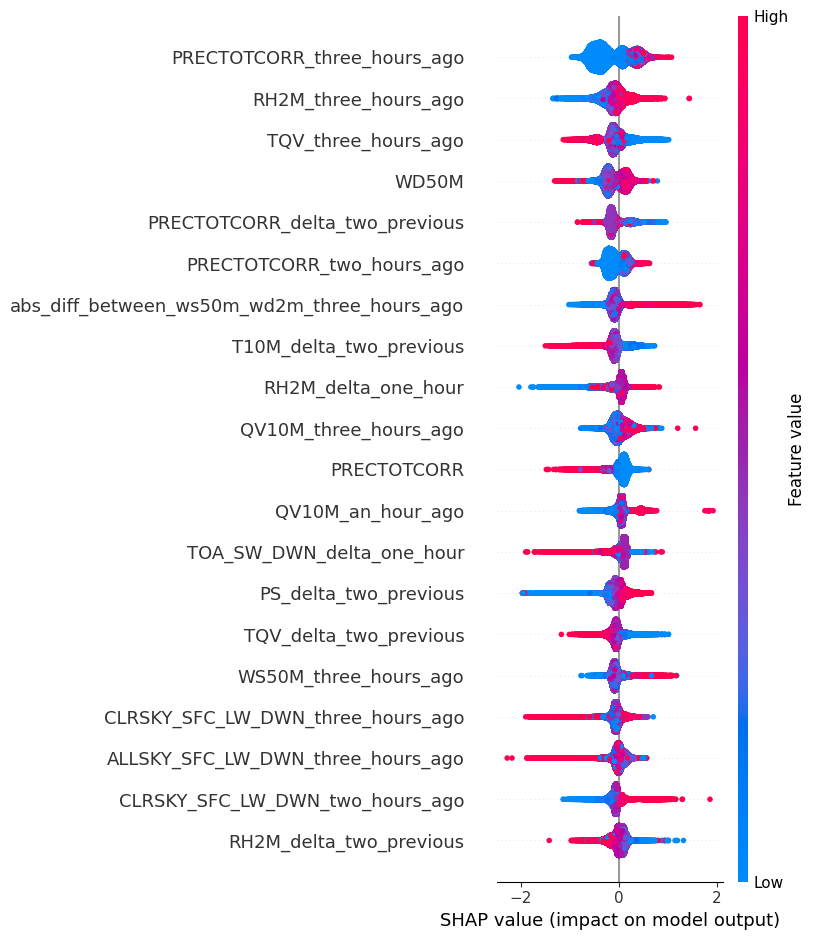

In [27]:
shap.summary_plot(shap_values, x_test)

In [28]:
data.head()

,time,T2M,ALLSKY_SFC_SW_DWN,PS,WS50M,ALLSKY_SFC_LW_DWN,WD50M,PRECTOTCORR,GWETPROF,CLRSKY_SFC_SW_DWN,...,abs_diff_between_ws50m_wd2m_two_hours_ago,abs_diff_between_ws50m_wd2m_three_hours_ago,abs_diff_between_ws50m_wd2m_delta_one_hour,abs_diff_between_ws50m_wd2m_delta_two_hour,abs_diff_between_ws50m_wd2m_delta_three_hour,abs_diff_between_ws50m_wd2m_delta_previous,abs_diff_between_ws50m_wd2m_delta_two_previous,abs_diff_between_ws50m_wd2m_previous_tendency,abs_diff_between_ws50m_wd2m_two_previous_tendency,abs_diff_between_ws50m_wd2m_current_tendency
episode_fips_time_id,,,,,,,,,,,,,,,,,,,,,
100009_55009_2015081414,2015081414,31.37,343.15,98.95,6.92,446.12,298.4,8.90,0.61,680.40,...,2.80,2.68,0.15,0.31,0.43,0.16,0.12,1,1,1
100009_55009_2015081415,2015081415,30.69,123.62,98.94,7.12,429.02,299.7,10.35,0.61,536.53,...,2.96,2.80,0.18,0.33,0.49,0.15,0.16,1,1,1
100009_55009_2015081416,2015081416,29.65,55.92,98.98,6.96,433.27,300.5,11.19,0.62,364.85,...,3.11,2.96,0.08,0.26,0.41,0.18,0.15,1,1,1
100009_55009_2015081417,2015081417,28.09,113.60,99.00,6.01,420.85,299.0,15.34,0.62,186.02,...,3.29,3.11,-0.15,-0.07,0.11,0.08,0.18,1,1,-1
100009_55009_2015081418,2015081418,25.44,30.73,99.04,5.62,398.95,297.0,16.12,0.62,36.67,...,3.37,3.29,0.76,0.61,0.69,-0.15,0.08,-1,1,1


In [41]:
shap_values

array([[ 0.24031919,  0.00384676, -0.03632367, ...,  0.        ,
        -0.00118752,  0.00035944],
       [ 0.07980472, -0.02026177, -0.04633866, ...,  0.        ,
        -0.00118752,  0.00035944],
       [ 0.04979262,  0.00866547,  0.01419224, ...,  0.        ,
        -0.00118752,  0.00035944],
       ...,
       [ 0.01333426,  0.00775281,  0.0428661 , ...,  0.        ,
        -0.00202132, -0.02447402],
       [ 0.01337565, -0.01526605,  0.09008434, ...,  0.        ,
        -0.00202132, -0.02447402],
       [ 0.01168328, -0.07897185,  0.12605064, ...,  0.        ,
        -0.00202132,  0.0180621 ]], dtype=float32)

In [31]:
shap.initjs()

In [57]:
data[data.index.isin(x_test.index.tolist())]['outage_in_an_hour']

episode_fips_time_id
100009_55009_2015081414    0
100009_55009_2015081415    0
100009_55009_2015081416    0
100009_55009_2015081417    0
100009_55009_2015081418    0
                          ..
99962_34029_2015100109     0
99962_34029_2015100110     0
99962_34029_2015100111     0
99962_34029_2015100112     0
99962_34029_2015100113     1
Name: outage_in_an_hour, Length: 257183, dtype: int64

In [66]:
x_test2 = x_test.reset_index()
x_test2[x_test2.episode_fips_time_id=='100009_55009_2015081417']

,episode_fips_time_id,T2M,ALLSKY_SFC_SW_DWN,PS,WS50M,ALLSKY_SFC_LW_DWN,WD50M,PRECTOTCORR,GWETPROF,CLRSKY_SFC_SW_DWN,...,abs_diff_between_ws50m_wd2m_two_hours_ago,abs_diff_between_ws50m_wd2m_three_hours_ago,abs_diff_between_ws50m_wd2m_delta_one_hour,abs_diff_between_ws50m_wd2m_delta_two_hour,abs_diff_between_ws50m_wd2m_delta_three_hour,abs_diff_between_ws50m_wd2m_delta_previous,abs_diff_between_ws50m_wd2m_delta_two_previous,abs_diff_between_ws50m_wd2m_previous_tendency,abs_diff_between_ws50m_wd2m_two_previous_tendency,abs_diff_between_ws50m_wd2m_current_tendency
3,100009_55009_2015081417,28.09,113.6,99.0,6.01,420.85,299.0,15.34,0.62,186.02,...,3.29,3.11,-0.15,-0.07,0.11,0.08,0.18,1,1,-1


In [33]:
explanation = explainer(x_test)

In [48]:
explainer = shap.TreeExplainer(model, x_test)
shap_values = explainer.shap_values(x_test)

100%|===================| 257140/257183 [46:13<00:00]        

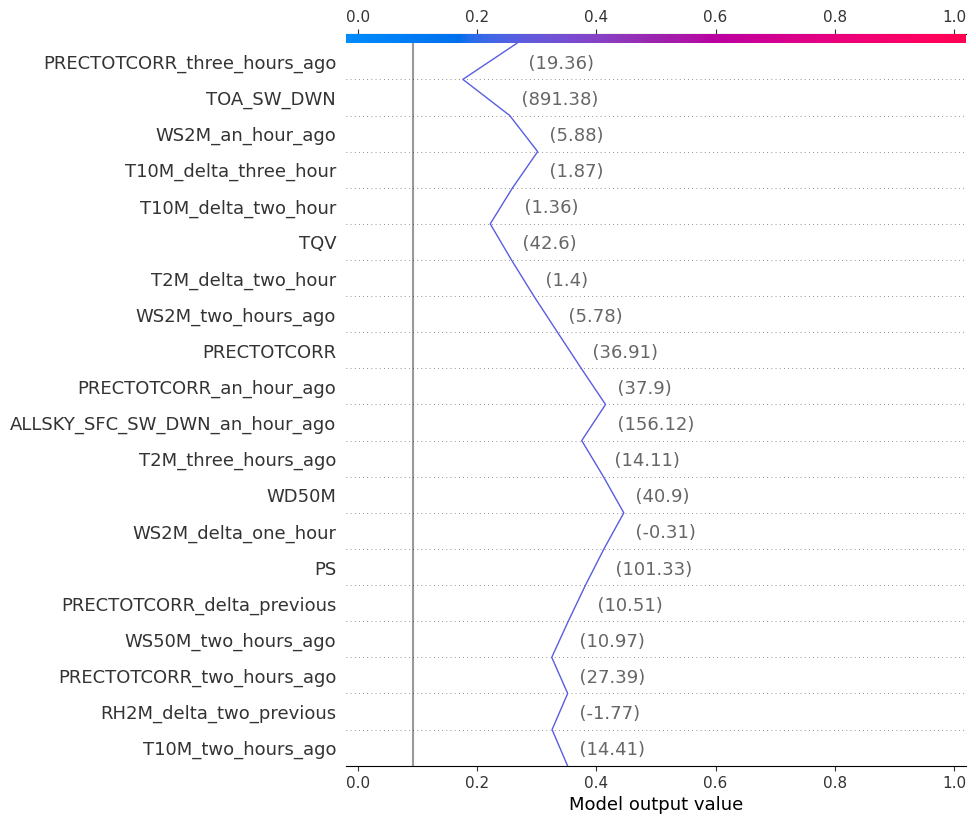

In [59]:
shap.decision_plot(explainer.expected_value, shap_values[257182,:], x_test.loc['99962_34029_2015100113',:], link='logit')

# 📊 SHAP Decision Plot — Quick Summary

## Overview
This decision plot illustrates how individual feature contributions accumulate to form the final model prediction.

- **X-axis**: Cumulative model output value.
- **Y-axis**: Features ordered by their importance.
- **Curve**: Shows the step-by-step impact of each feature on the prediction.
- **Feature values**: Displayed in parentheses.

---

## 🔹 Key Points

- **Starting point**: The prediction starts from the base value (expected model output).
- **Major contributors**:
  - `TOA_SW_DWN (891.38)` and `ALLSKY_SFC_SW_DWN_an_hour_ago (156.12)` contribute significantly to **decreasing** the model output.
  - Features like `PRECTOTCORR_three_hours_ago (19.36)` and `T2M_three_hours_ago (14.11)` contribute **moderately**.
- **Movement**:
  - **Leftward shifts** represent features that lower the model output.
  - **Rightward shifts** represent features that raise the model output.
- **Final prediction**: Resulting from a mix of small positive and stronger negative contributions, stabilizing around **0.4**.

---

## 📝 Conclusion
The final prediction is mainly driven by the strong negative impacts of a few key features, resulting in a model output slightly lower than the base value.


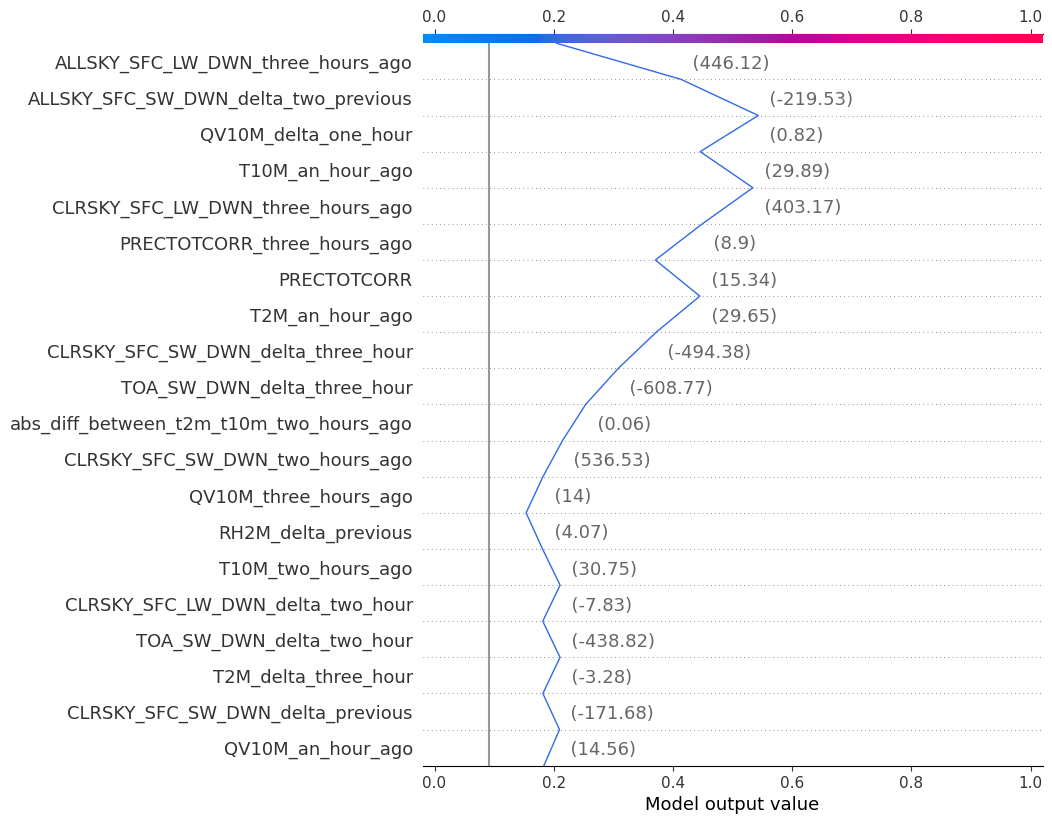

In [67]:
shap.decision_plot(explainer.expected_value, shap_values[3,:], x_test.loc['100009_55009_2015081417',:], link='logit')

# 📊 SHAP Decision Plot — Quick Summary

## 🔹 Key Points

- **Major contributors**:
  - `ALLSKY_SFC_LW_DWN_three_hours_ago (446.12)` significantly **decreases** the prediction.
  - `CLRSKY_SFC_SW_DWN_delta_three_hour (-608.77)` and `T2M_an_hour_ago (-494.38)` strongly **decrease** the model output.
  - `T10M_an_hour_ago (403.17)` provides a large **positive** contribution.
- **Other observations**:
  - `CLRSKY_SFC_SW_DWN_two_hours_ago (536.53)` also increases the model output significantly.
  - Features like `PRECTOTCORR (15.34)` and `QV10M_delta_one_hour (0.82)` have smaller impacts.
- **Final prediction**:
  - The cumulative effect of negative and positive contributions results in a prediction slightly above **0.2**.

---

## 📝 Conclusion
The prediction is mainly influenced by strong opposing forces: a few features with large positive contributions (like `T10M_an_hour_ago`) and others with heavy negative impacts (like `CLRSKY_SFC_SW_DWN_delta_three_hour`), ultimately producing a relatively low output value.
